# Spam Classification

We have a dataset with feature variables as messages and target variables as Ham/Spam.            
We are creating a ANN to predict whether a message is spam or not.

In [7]:
# install Natural Language Toolkit (nltk) for NL processing
!pip install nltk

import nltk
# stopwords are "a","the","in"... this module identifies stopwords and ignores them while processing
nltk.download('stopwords')
# punkt module basically divides large text to list of sentences using unsupervised algo.
nltk.download('punkt')

from nltk.corpus import stopwords

# lemmatising is process of reducing words to it's base/dictionary form
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# create an instance for lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syanthan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/syanthan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/syanthan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Creating Text Representation

Text data needs to be converted into numeric representation before they can be used to train deep learning models. 
We convert spam classification feature data to TF-IDF vectors and target variables to one hot encoding array.   

In [8]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# Load the data and read
spam_data = pd.read_csv('Spam-Classification.csv')

print("\nLoaded Data\n-------------------")
print(spam_data.head())


Loaded Data
-------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [9]:
# Seperate feature and target data
x_data = spam_data['SMS']
y_data = spam_data['CLASS']

print(x_data,y_data)

0        said kiss, kiss, i can't do the sound effects...
1           &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2       (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3       * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4       **FREE MESSAGE**Thanks for using the Auction S...
                              ...                        
1495         Yup, no need. I'll jus wait 4 e rain 2 stop.
1496    Yup... From what i remb... I think should be c...
1497                             Yup... How Ã¼ noe leh...
1498    Yup... Ok i go home look at the timings then i...
1499    <Forwarded from 21870000>Hi - this is your Mai...
Name: SMS, Length: 1500, dtype: object 0        ham
1        ham
2       spam
3       spam
4       spam
        ... 
1495     ham
1496     ham
1497     ham
1498     ham
1499    spam
Name: CLASS, Length: 1500, dtype: object


TF-IDF(Term Frequency Inverse Document Frequency) is a very common algorithm to transform text into meaningful representation of numbers which is used to fit machine learning algorithm for prediction.

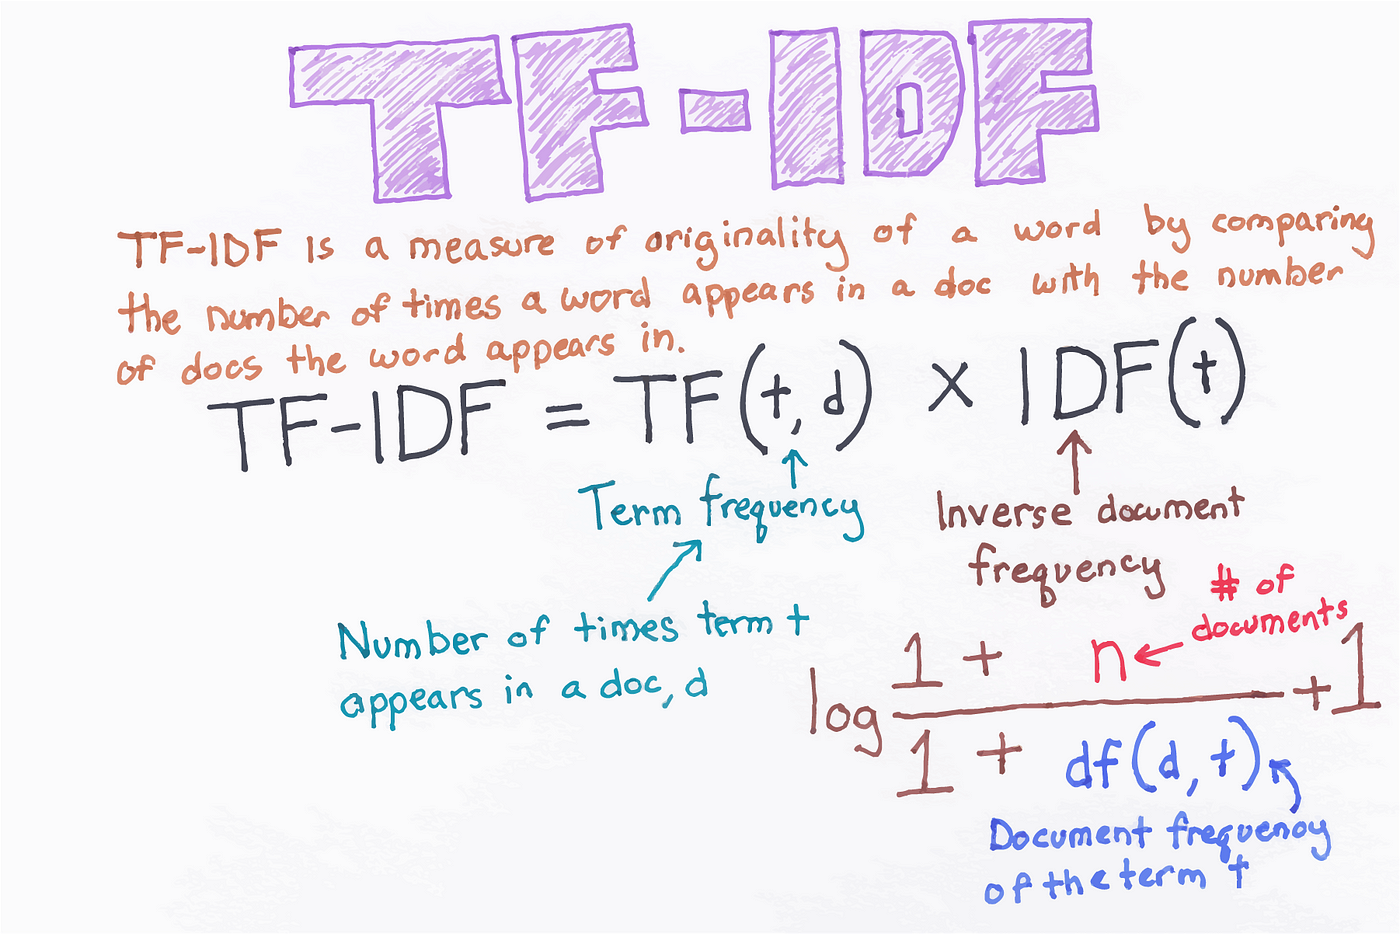

In [11]:
import nltk
import tensorflow as tf

# Custom tokenizer to remove stopwords and lemmatizing
def customtokenize(str):
    # split strings as tokens
    tokens = nltk.word_tokenize(str)
    # filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    # perform lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

# Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

# Transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(x_data)
# convert tfidf to numpy array
tfidf_array = tfidf.toarray()

# Build a label encoder to convert target variable from strings to numeric representation
from sklearn import preprocessing
# create instance of label encoder
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(y_data)

# convert target to one hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

print("TF-IDF Matrix Shape: ",tfidf.shape)
print("One hot encoding shape: ",spam_classes.shape)


TF-IDF Matrix Shape:  (1500, 4566)
One hot encoding shape:  (1500, 2)


## Building and Evaluating a model

In [13]:
# Split the data to train and test data
x_train,x_test,y_train,y_test = train_test_split(tfidf_array,spam_classes,test_size=0.10)


from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# set up hyperparameters for building the model
NB_CLASSES = 2
N_HIDDEN = 32

# Create a model using keras
model = tf.keras.models.Sequential()

# Add a Hidden layer
model.add(keras.layers.Dense(N_HIDDEN,  # number of nodes
                             input_shape=(x_train.shape[1],),
                             name = "Hidden_layer_1",
                             activation = 'relu'))

# Add a Hidden layer
model.add(keras.layers.Dense(N_HIDDEN,
                             name = "Hidden_layer_2",
                             activation = 'relu'))

# Add output layer
model.add(keras.layers.Dense(NB_CLASSES,
                             name = "Output_layer",
                             activation = 'softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy",
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 Output_layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147,266
Trainable params: 147,266
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training the model
VERBOSE = 1

# set up hyperparameters for training
BATCH_SIZE = 256
EPOCHS = 10
VALIDATION_SPLIT = 0.2

print("\nTraining in Progress\n----------------------")

history = model.fit(x_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)


Training in Progress
----------------------
Epoch 1/10


2023-11-16 18:11:51.474938: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 19ms/step - loss: 0.6904 - accuracy: 0.5926 - val_loss: 0.6825 - val_accuracy: 0.7259
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.8417 - val_loss: 0.6591 - val_accuracy: 0.8481
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6355 - accuracy: 0.9537 - val_loss: 0.6221 - val_accuracy: 0.8593
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.5867 - accuracy: 0.9667 - val_loss: 0.5788 - val_accuracy: 0.8926
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.5301 - accuracy: 0.9750 - val_loss: 0.5317 - val_accuracy: 0.9259
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4715 - accuracy: 0.9787 - val_loss: 0.4843 - val_accuracy: 0.9296
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4132 - accuracy: 0.9806 - val_loss: 0.4404 - val_accuracy: 0.9333
Epoch 8/10
5/5 [============================


Accuracy during Training
-------------------


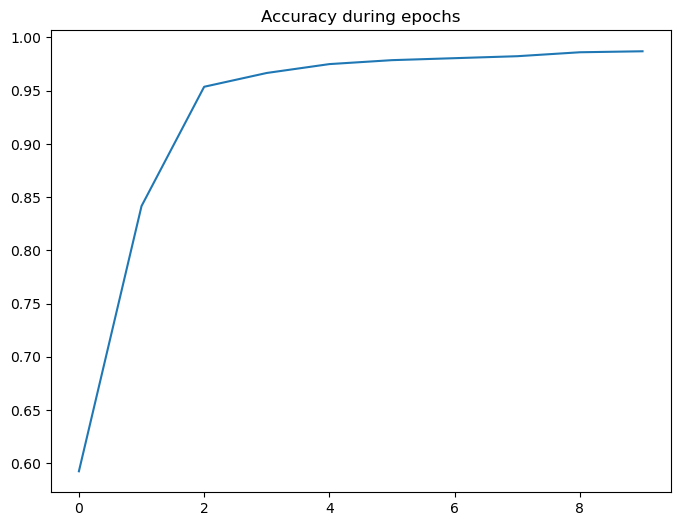

In [16]:
print("\nAccuracy during Training\n-------------------")

import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,6))
plt.title("Accuracy during epochs")
plt.show()

In [17]:
# Evaluating against test data set
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 868us/step - loss: 0.3188 - accuracy: 0.9533


[0.31879526376724243, 0.95333331823349]

In [22]:
# Testing on raw data
predict_tfidf = vectorizer.transform(["Get 20% discount on the credit cards. Avail now!!"]).toarray()

print(predict_tfidf.shape)

# predict using model
prediction = np.argmax(model.predict(predict_tfidf),axis=1)
print("prediction is: ",prediction)

print("Prediction says the mail is: ",label_encoder.inverse_transform(prediction))

(1, 4566)
1/1 [==============================] - 0s 12ms/step
prediction is:  [1]
Prediction says the mail is:  ['spam']
